In [210]:
pd.set_option('display.max_rows', 50)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


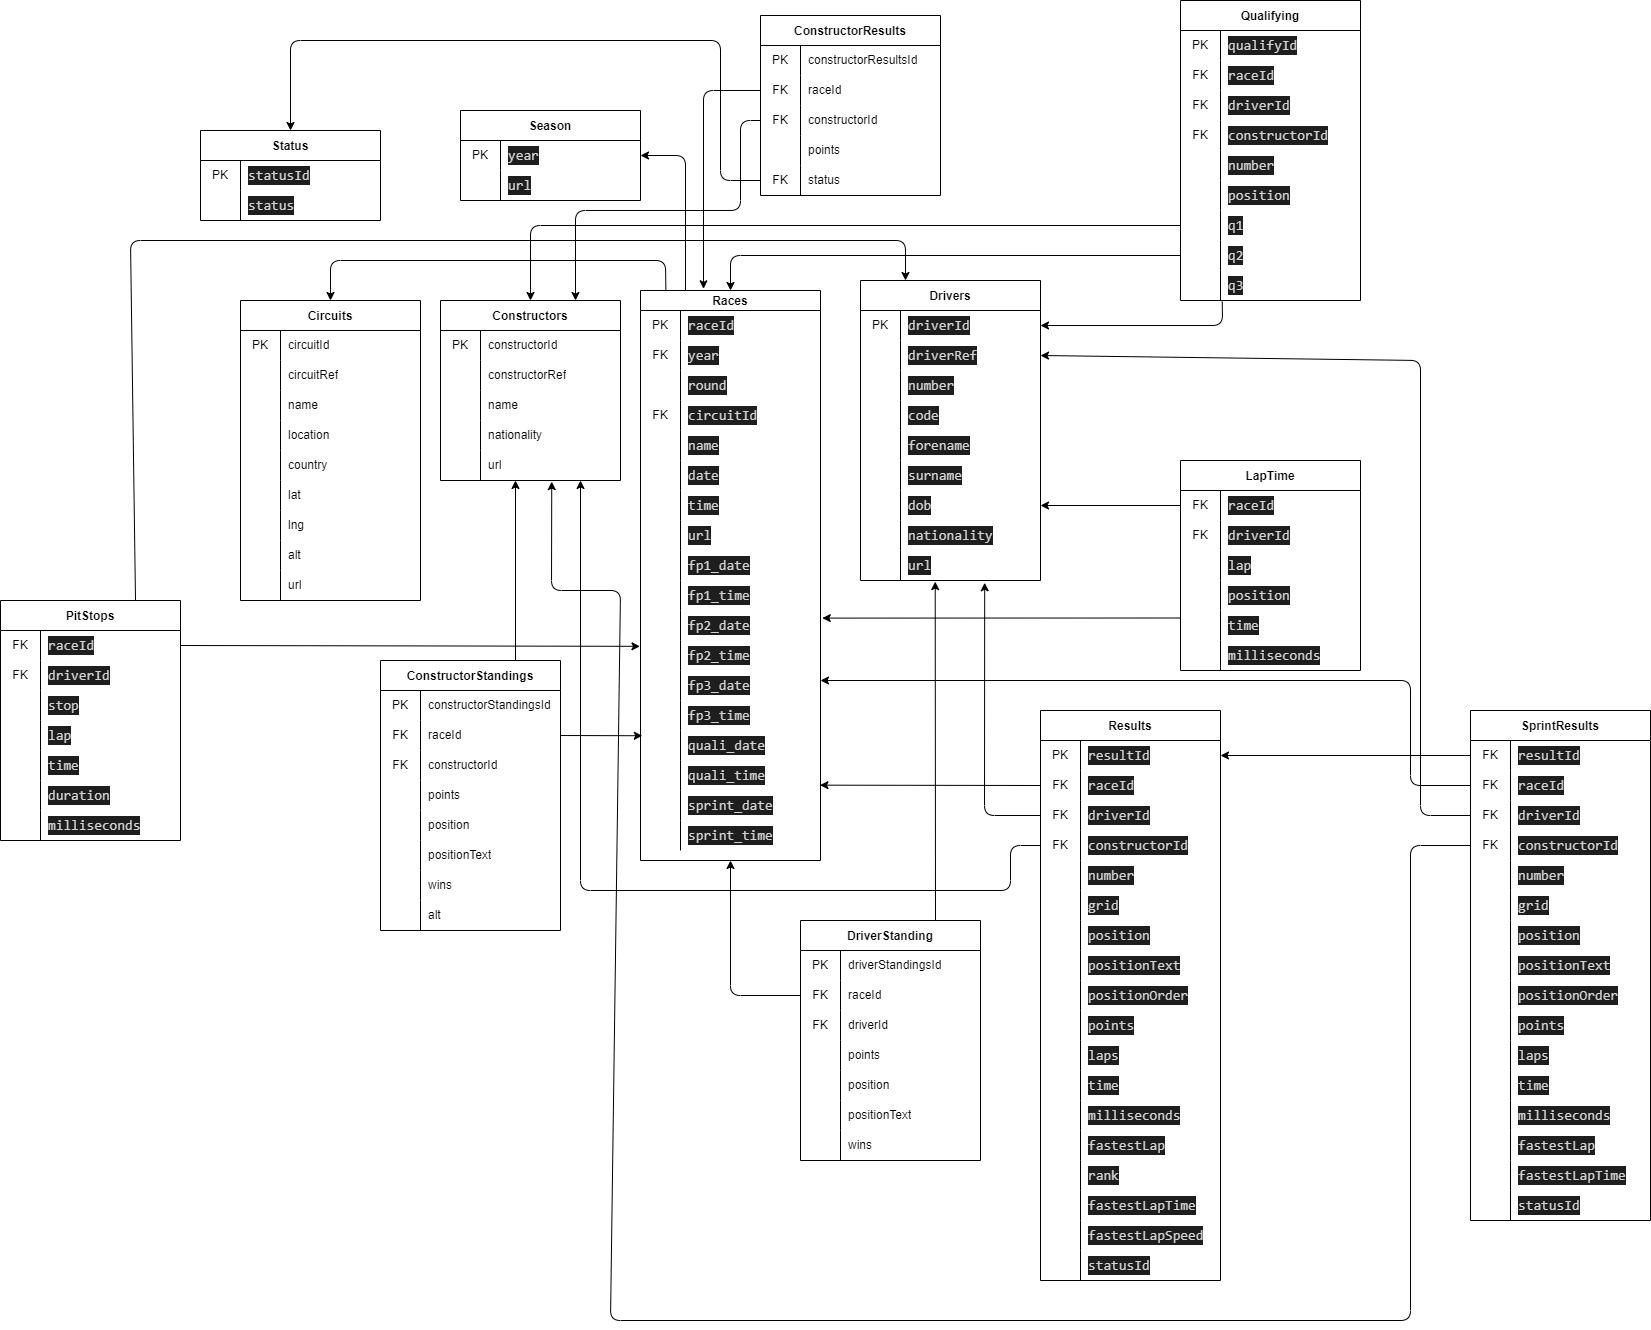

In [211]:
from IPython.display import Image
Image(filename='..\drawing\\relationship.png') 

In [212]:
df_circuits = pd.read_csv('..\data\circuits.csv', index_col=False)
df_constructor_results = pd.read_csv('..\data\constructor_results.csv', index_col=False)
df_constructor_standings = pd.read_csv('..\data\constructor_standings.csv', index_col=False)
df_constructors = pd.read_csv('..\data\constructors.csv', index_col=False)
df_driver_standings = pd.read_csv('..\data\driver_standings.csv', index_col=False)
df_drivers = pd.read_csv('..\data\drivers.csv', index_col=False)
df_lap_times = pd.read_csv('..\data\lap_times.csv', index_col=False)
df_pit_stops = pd.read_csv('..\data\pit_stops.csv', index_col=False)
df_qualifying = pd.read_csv('..\data\qualifying.csv', index_col=False)
df_races = pd.read_csv('..\data\\races.csv', index_col=False)
df_results = pd.read_csv('..\data\\results.csv', index_col=False)
df_seasons = pd.read_csv('..\data\seasons.csv', index_col=False)
df_sprint_results = pd.read_csv('..\data\sprint_results.csv', index_col=False)
df_status = pd.read_csv('..\data\status.csv', index_col=False)

In [213]:
df = (df_results.merge(df_races[['raceId','name','date']],on='raceId', how='left')
    .merge(df_drivers[['driverId','driverRef','nationality','dob']],on='driverId', how='left')
    .merge(df_constructors[['constructorId','name','nationality']],on='constructorId', how='left')
    .merge(df_status[['statusId','status']],on='statusId', how='left')
)

In [214]:
df = df[['resultId', 'name_x', 'date', 'driverRef','nationality_x', 'dob', 'name_y', 'nationality_y', 'status', 'number', 'grid','position', 'positionOrder', 'points', 'laps','milliseconds', 'fastestLap', 'rank', 'fastestLapTime','fastestLapSpeed','status']].rename(columns={"name_x":"RacerName", "name_y":"ConstructorName","nationality_x":"RacerNacionality","nationality_y":"ConstructorNacionality"})

In [215]:
df.head()

,resultId,RacerName,date,driverRef,RacerNacionality,dob,ConstructorName,ConstructorNacionality,status,number,...,position,positionOrder,points,laps,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,status
0,1,Australian Grand Prix,2008-03-16,hamilton,British,1985-01-07,McLaren,British,Finished,22,...,1,1,10.0,58,5690616,39,2,1:27.452,218.300,Finished
1,2,Australian Grand Prix,2008-03-16,heidfeld,German,1977-05-10,BMW Sauber,German,Finished,3,...,2,2,8.0,58,5696094,41,3,1:27.739,217.586,Finished
2,3,Australian Grand Prix,2008-03-16,rosberg,German,1985-06-27,Williams,British,Finished,7,...,3,3,6.0,58,5698779,41,5,1:28.090,216.719,Finished
3,4,Australian Grand Prix,2008-03-16,alonso,Spanish,1981-07-29,Renault,French,Finished,5,...,4,4,5.0,58,5707797,58,7,1:28.603,215.464,Finished
4,5,Australian Grand Prix,2008-03-16,kovalainen,Finnish,1981-10-19,McLaren,British,Finished,23,...,5,5,4.0,58,5708630,43,1,1:27.418,218.385,Finished


In [216]:
df = df.replace('\\N', 0) # Replacing nulls per 0

In [217]:
#for col1 in ['resultId', 'RacerName', 'driverRef', 'RacerNacionality',
#       'ConstructorName', 'ConstructorNacionality', 'status', 'number', 'grid',
#       'position', 'positionOrder', 'points', 'rank', 'status']:
#    df[col1] = df[col1].astype('category')
#df = df.astype({'milliseconds':'int64'})
#df['fastestLapTime'] = df['fastestLapTime'].apply(pd.to_datetime)
#df['date'] = df['date'].apply(pd.to_datetime)
#df['dob'] = df['dob'].apply(pd.to_datetime)

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   resultId                25660 non-null  int64  
 1   RacerName               25660 non-null  object 
 2   date                    25660 non-null  object 
 3   driverRef               25660 non-null  object 
 4   RacerNacionality        25660 non-null  object 
 5   dob                     25660 non-null  object 
 6   ConstructorName         25660 non-null  object 
 7   ConstructorNacionality  25660 non-null  object 
 8   status                  25660 non-null  object 
 9   number                  25660 non-null  object 
 10  grid                    25660 non-null  int64  
 11  position                25660 non-null  object 
 12  positionOrder           25660 non-null  int64  
 13  points                  25660 non-null  float64
 14  laps                    25660 non-null

In [219]:
px.bar(df.query('position == "1"')
.groupby(["driverRef"])["RacerName"].agg({'count'})
.sort_values('count',ascending=False).head(20), title='Top 20 Race Winners'
)


Racers and its winning circuits

In [220]:
(df.query('position == "1"')
.groupby(["driverRef","RacerName"])["driverRef"].agg({'count'})
.sort_values('driverRef',ascending=True)
)

count
driverRef RacerName                       
alboreto  Belgian Grand Prix             1
          Caesars Palace Grand Prix      1
          Canadian Grand Prix            1
          Detroit Grand Prix             1
          German Grand Prix              1
...                                    ...
webber    Brazilian Grand Prix           2
          British Grand Prix             2
          German Grand Prix              1
          Hungarian Grand Prix           1
          Spanish Grand Prix             1

[636 rows x 1 columns]

Number of unique circuits the racers won

In [221]:
(df.query('position == "1"')
.groupby(["driverRef"])["RacerName"].agg({'nunique'})
.sort_values('nunique',ascending=False)
)

,nunique
driverRef,
hamilton,31
michael_schumacher,22
vettel,21
max_verstappen,21
prost,18
...,...
bryan,1
mass,1
hanks,1


Circuits and it`s respective winners along the time

In [222]:
(df.query('position == "1"')
.groupby(["RacerName","driverRef"])["RacerName"].agg({'count'})
.sort_values('RacerName',ascending=False)
)


count
RacerName                     driverRef            
United States Grand Prix West watson              1
                              reutemann           1
                              regazzoni           1
                              piquet              1
                              mario_andretti      1
...                                             ...
Abu Dhabi Grand Prix          max_verstappen      2
                              bottas              1
                              rosberg             1
                              vettel              3
70th Anniversary Grand Prix   max_verstappen      1

[636 rows x 1 columns]

Ranking circuits that had repetitive winners

In [223]:
(df.query('position == "1"')
.groupby(["RacerName","driverRef"])["RacerName"].agg({'count'})
.query('count >= 2')
.sort_values('count',ascending=False)
)

count
RacerName                driverRef                
British Grand Prix       hamilton                8
French Grand Prix        michael_schumacher      8
Hungarian Grand Prix     hamilton                8
Canadian Grand Prix      michael_schumacher      7
                         hamilton                7
...                                            ...
French Grand Prix        gurney                  2
                         hamilton                2
                         hawthorn                2
                         lauda                   2
United States Grand Prix stewart                 2

[233 rows x 1 columns]

In [226]:
circuits = df['RacerName'].unique()
hamilton_circuits = df.query('position == "1" and driverRef == "hamilton"')['RacerName'].unique()

In [227]:
for cir in circuits:
    if cir not in hamilton_circuits:
        print(cir)

European Grand Prix
San Marino Grand Prix
Argentine Grand Prix
Luxembourg Grand Prix
Pacific Grand Prix
South African Grand Prix
Detroit Grand Prix
Dutch Grand Prix
Dallas Grand Prix
United States Grand Prix West
Swiss Grand Prix
Caesars Palace Grand Prix
Swedish Grand Prix
Indianapolis 500
Moroccan Grand Prix
Pescara Grand Prix
Korean Grand Prix
Indian Grand Prix
70th Anniversary Grand Prix
Sakhir Grand Prix
Mexico City Grand Prix
Miami Grand Prix


array(['Australian Grand Prix', 'Malaysian Grand Prix',
       'Bahrain Grand Prix', 'Spanish Grand Prix', 'Turkish Grand Prix',
       'Monaco Grand Prix', 'Canadian Grand Prix', 'French Grand Prix',
       'British Grand Prix', 'German Grand Prix', 'Hungarian Grand Prix',
       'European Grand Prix', 'Belgian Grand Prix', 'Italian Grand Prix',
       'Singapore Grand Prix', 'Japanese Grand Prix',
       'Chinese Grand Prix', 'Brazilian Grand Prix',
       'United States Grand Prix', 'San Marino Grand Prix',
       'Austrian Grand Prix', 'Argentine Grand Prix',
       'Luxembourg Grand Prix', 'Portuguese Grand Prix',
       'Pacific Grand Prix', 'South African Grand Prix',
       'Mexican Grand Prix', 'Detroit Grand Prix', 'Dutch Grand Prix',
       'Dallas Grand Prix', 'United States Grand Prix West',
       'Swiss Grand Prix', 'Caesars Palace Grand Prix',
       'Swedish Grand Prix', 'Abu Dhabi Grand Prix', 'Indianapolis 500',
       'Moroccan Grand Prix', 'Pescara Grand Prix', 'Ko